In [1]:
import os
import math

import numpy as np
import pandas as pd

from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

In [2]:
WORKDIR = ""#os.path.split(os.getcwd())
YEARS_AVAILABLE = [2014, 2018, 2021]

In [3]:
WORKDIR

''

## Get the data

__Load into Pandas DataFrame__

In [4]:
file = ''.join([WORKDIR, "../../data/output/hotspot_spi.csv"]) 
dataset = pd.read_csv(file)

dataset

,ano,estado,municipio,diasemchuva,precipitacao,riscofogo,frp,fococalor,riscofogocat,IPS Amazônia,...,Gravidez na infância e adolescência,Trabalho Infantil,Vulnerabilidade familiar,Violência contra indígenas,Violência contra indígenas Taxa,Violência contra mulheres,Violência infantil,Violência infantil Taxa,Empregos ensino superior,Mulheres com empregos ensino superior
0,2014,ACRE,ACRELANDIA,0.9,0.38,0.23,0.00,441,BAIXO,54.64,...,26.77,288.91,12.27,0.00,1.0,29.60,22.32,2.0,13.81,7.35
1,2014,ACRE,ASSIS BRASIL,1.7,0.46,0.15,0.00,327,BAIXO,53.48,...,36.22,201.25,17.35,1.88,2.0,58.91,80.48,3.0,8.17,4.54
2,2014,ACRE,BRASILEIA,1.4,0.36,0.19,0.00,1120,BAIXO,50.05,...,31.08,144.83,20.11,40.00,5.0,300.00,683.19,5.0,9.97,6.59
3,2014,ACRE,BUJARI,0.8,0.36,0.12,0.00,339,BAIXO,54.02,...,34.30,824.47,16.12,0.00,1.0,45.11,32.66,2.0,12.97,9.16
4,2014,ACRE,CAPIXABA,0.8,0.10,0.08,0.00,455,BAIXO,53.15,...,32.05,172.42,26.07,0.00,1.0,0.00,0.00,1.0,11.60,7.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,2021,TOCANTINS,TOCANTINOPOLIS,23.2,0.32,0.85,9.03,799,ALTO,53.76,...,25.06,19.09,58.55,16.50,4.0,632.00,433.17,5.0,15.30,11.06
2312,2021,TOCANTINS,TUPIRAMA,39.5,0.94,0.81,7.53,180,ALTO,53.14,...,30.77,9.64,53.85,0.00,1.0,148.61,141.85,4.0,20.10,14.28
2313,2021,TOCANTINS,TUPIRATINS,43.5,0.41,0.89,9.99,690,ALTO,60.37,...,32.14,3.05,28.57,0.00,1.0,159.21,0.00,1.0,19.09,15.72
2314,2021,TOCANTINS,WANDERLANDIA,17.7,0.42,0.80,4.85,622,ALTO,54.31,...,27.59,11.80,81.03,0.00,1.0,0.00,24.26,2.0,15.15,12.15


In [5]:
le = LabelEncoder()

dataset["estado"] = le.fit_transform(dataset["estado"])
dataset["municipio"] = le.fit_transform(dataset["municipio"])

## Functions

#### Ajusted Rand Index

In [7]:
def perform_ari(true_labels, predicted_label):
    ari = metrics.adjusted_rand_score(true_labels, predicted_label)
    return round(ari, 2)

In [8]:
def xyz(features, true_labels):
    print("===========================================================")
    print("Features:\n", features[:5])
    print("True Labels:\n", true_labels[:5])
    print("===========================================================")
    
    
    # Standarization
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    print("Scaled Features:\n", scaled_features[:5])
    print("===========================================================")
    
    
    # Create AffinityPropagation Model
    af = AffinityPropagation().fit(scaled_features)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_
    
    n_clusters = len(cluster_centers_indices)
    
    
    # Plot result
    plot_result(scaled_features, labels, n_clusters, cluster_centers_indices)
    
    
    # Statistics from the initialization
    print("===========================================================")
    # Estimated Number of Clusters
    print("Estimated Number of Clusters: %d" % n_clusters)

    # Homogeneity
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(true_labels, labels))

    # Completeness
    print("Completeness: %0.3f" % metrics.completeness_score(true_labels, labels))
    
    # V-measure
    print("V-measure: %0.3f" % metrics.v_measure_score(true_labels, labels))
    
    # Adjusted Rand Index
    print("Adjusted Rand Index:", perform_ari(true_labels, labels))
    
    
    # Silhouette Coefficient
    print(
        "Silhouette Coefficient: %0.3f"
        % metrics.silhouette_score(features, labels, metric="sqeuclidean")
    )
    print("===========================================================")
    
    
    
def plot_result(features, labels, n_clusters, cluster_centers_indices):

    plt.close("all")
    plt.figure(1)
    plt.clf()

    colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
    
    for k, col in zip(range(n_clusters), colors):
        class_members = labels == k
        cluster_center = features[cluster_centers_indices[k]]
        plt.plot(features[class_members, 0], features[class_members, 1], col + ".")
        
        plt.plot(
            cluster_center[0], cluster_center[1], "o",
            markerfacecolor = col, markeredgecolor="k", markersize=14,
        )
        
        for x in features[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title("Estimated Number of Clusters: %d" % n_clusters)
    plt.show()

## Model Params

In [9]:
YEAR = 2018

## 1º Study Case - Only the dimensions

Features:
 [[63.41 52.44 41.28]
 [66.74 57.98 39.32]
 [67.3  62.61 23.07]
 [60.64 50.64 50.93]
 [60.12 53.51 40.98]]
True Labels:
 ['ALTO' 'MODERADO' 'MODERADO' 'MODERADO' 'MODERADO']
Scaled Features:
 [[-0.02642865 -0.30655314 -0.86812976]
 [ 0.4496538   0.71384642 -1.21216036]
 [ 0.52971572  1.56663521 -4.06445485]
 [-0.4224492  -0.6380909   0.82569435]
 [-0.4967924  -0.10947236 -0.92078751]]


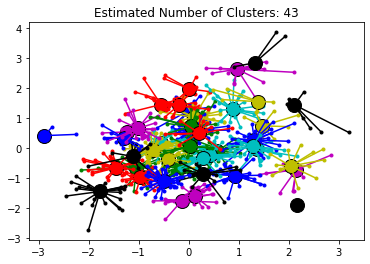

Estimated Number of Clusters: 43
Homogeneity: 0.147
Completeness: 0.030
V-measure: 0.050
Adjusted Rand Index: 0.01
Silhouette Coefficient: 0.359


In [10]:
dsyear = dataset[dataset["ano"] == YEAR]
true_labels = dsyear["riscofogocat"].values
features = dsyear[[
    "Necessidades Humanas Básicas",
    "Fundamentos para o Bem-Estar",
    "Oportunidades"
]].values


xyz(features, true_labels)

## 2º Study Case - "Necessidades Humanas Básicas" Components

Features:
 [[92.37 41.12 86.09 34.06]
 [90.48 54.53 69.15 52.79]
 [91.   56.7  79.41 42.11]
 [92.54 42.45 71.32 36.24]
 [91.36 31.36 82.84 34.91]]
True Labels:
 ['ALTO' 'MODERADO' 'MODERADO' 'MODERADO' 'MODERADO']
Scaled Features:
 [[ 0.66145409  0.11709131  0.50301432 -0.65827142]
 [ 0.31156197  0.95687802 -0.73469894  0.28540484]
 [ 0.40782859  1.09277191  0.01494321 -0.25268712]
 [ 0.69292587  0.20038112 -0.5761489  -0.54843617]
 [ 0.4744747  -0.49411811  0.26555458 -0.61544575]]


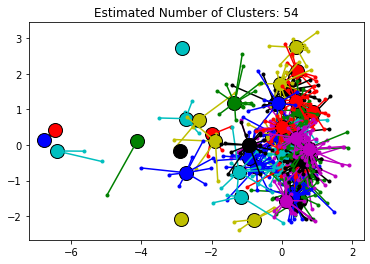

Estimated Number of Clusters: 54
Homogeneity: 0.133
Completeness: 0.026
V-measure: 0.043
Adjusted Rand Index: 0.0
Silhouette Coefficient: 0.195


In [11]:
dsyear = dataset[dataset["ano"] == YEAR]
true_labels = dsyear["riscofogocat"].values
features = dsyear[[
    "Nutrição e cuidados médicos básicos",
    "Água e saneamento",
    "Moradia",
    "Segurança pessoal"
]].values

xyz(features, true_labels)

## 3º Study Case - "Oportunidades" Components

Features:
 [[27.52 64.41 65.09  8.11]
 [19.61 72.32 58.19  7.17]
 [16.56 66.46  0.    9.27]
 [28.57 63.27 98.39 13.5 ]
 [35.82 64.91 56.66  6.51]]
True Labels:
 ['ALTO' 'MODERADO' 'MODERADO' 'MODERADO' 'MODERADO']
Scaled Features:
 [[-0.01548769  0.11381718 -0.81503813 -0.38104072]
 [-1.31335907  1.16931911 -1.14023848 -0.49164484]
 [-1.81380252  0.38736699 -3.88276149 -0.24455052]
 [ 0.15679612 -0.0383032   0.75440707  0.25316804]
 [ 1.34637482  0.18053665 -1.21234813 -0.56930306]]


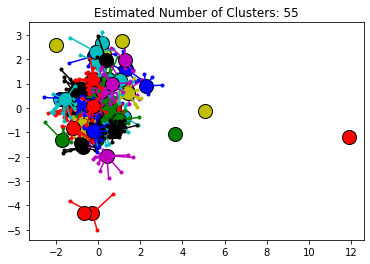

Estimated Number of Clusters: 55
Homogeneity: 0.152
Completeness: 0.030
V-measure: 0.050
Adjusted Rand Index: 0.0
Silhouette Coefficient: 0.094


In [12]:
dsyear = dataset[dataset["ano"] == YEAR]
true_labels = dsyear["riscofogocat"].values
features = dsyear[[
    "Direitos individuais",
    "Liberdade individual e de escolha",
    "Tolerância e inclusão",
    "Acesso à educação superior"
]].values

xyz(features, true_labels)

## 4º Study Case - "Necessidades Humanas Básicas" Indicators

Features:
 [[19.53  0.    6.66  6.66  3.64 31.41 82.3  36.21 51.62 96.03 95.31 92.1
  48.98  6.   28.68  5.   22.12]
 [16.13  0.   13.48 13.48  3.61 35.84 63.95 72.14 37.96 61.22 83.99 82.73
  69.65  6.    9.06  3.    4.49]
 [19.3   1.75  7.61  7.74  4.31 47.26 72.65 61.26 54.71 79.84 89.94 85.72
  33.21  5.   21.73  5.   11.52]
 [ 6.51  4.08  9.89  9.74  3.35 37.48 57.66 42.22 45.   78.5  77.86 76.7
  62.44  6.   39.26  5.    9.84]
 [20.58  0.    0.   25.57  2.18 33.93 12.02 35.94 38.68 87.59 96.17 95.78
  64.2   6.   34.57  5.   17.32]]
True Labels:
 ['ALTO' 'MODERADO' 'MODERADO' 'MODERADO' 'MODERADO']
Scaled Features:
 [[-0.05351644 -0.47211043  0.05821303 -0.71040014 -0.92605631 -1.1797335
   1.88589583 -0.67245802 -0.45289009  0.70725927  0.77331944  0.59724773
   0.08643311  0.72737084  0.19397926  0.52384349 -0.01610351]
 [-0.33284187 -0.47211043  0.73873593 -0.286026   -0.95070007 -1.00075918
   1.20016886  0.64100457 -1.09645613 -1.59240518  0.0803696  -0.00251725
   0.6136591

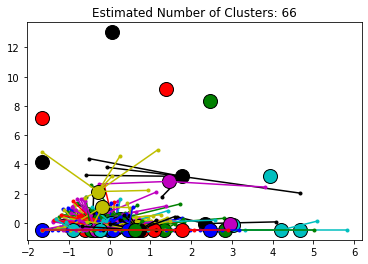

Estimated Number of Clusters: 66
Homogeneity: 0.225
Completeness: 0.042
V-measure: 0.071
Adjusted Rand Index: 0.0
Silhouette Coefficient: 0.026


In [13]:
dsyear = dataset[dataset["ano"] == YEAR]
true_labels = dsyear["riscofogocat"].values
features = dsyear[[
    "Mortalidade infantil até 5 anos",
    "Mortalidade materna",
    "Mortalidade por desnutrição",
    "Mortalidade por doenças infecciosas",
    "Subnutrição",
    
    "Abastecimento de água",
    "Esgotamento sanitário",
    "Índice de atendimento de agua",
    
    "Coleta de lixo",
    "Moradias com iluminação adequada",
    "Moradias com parede adequada",
    "Moradias com piso adequado",
    
    "Assassinatos de jovens",
    "Assassinatos de jovens Taxa",
    "Homicídios",
    "Homicídios Taxa",
    "Mortes por acidente no trânsito",

]].values

xyz(features, true_labels)

### 4º Study Case - "Fundamentos para o Bem-Estar" Indicators

Features:
 [[  2.    26.3   41.3    4.95   8.1   11.89   8.44  55.83   4.04  32.77
   65.55 111.43  58.99   6.66   0.    62.97   3.86  97.57  10.72]
 [  5.9   47.    40.9    4.2   14.3   15.16  17.4   47.77   5.4   13.48
   26.97 121.34  53.93  13.7   84.08   5.54   5.52  89.5   26.03]
 [  1.2   21.1   23.9    6.1    4.6   17.48  19.68  66.89   7.45  34.25
   64.69 137.    49.47   7.08  49.14  35.     4.58  77.38  19.58]
 [  4.7   32.5   41.2    4.15   5.5    8.13   9.35  36.47   7.07   9.74
   68.19  77.93  68.19  19.48  11.25  40.66   2.78 114.26  21.66]
 [  4.1   33.    27.2    4.3   10.8    9.45  10.81  44.16   3.9   34.09
   25.57  25.57  17.05   9.87   3.16  51.98   3.82  98.33  17.89]]
True Labels:
 ['ALTO' 'MODERADO' 'MODERADO' 'MODERADO' 'MODERADO']
Scaled Features:
 [[-2.76401033e-01  3.00751650e-01  1.89842573e-01  7.66804226e-01
  -4.76735724e-02  2.63346285e-01 -3.28405466e-02  6.64129967e-02
  -5.00497625e-01 -1.00800210e-02  2.34818019e-01 -2.85771253e-01
   5.68952045e-

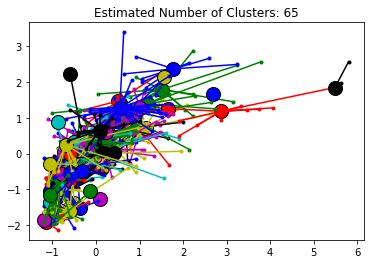

Estimated Number of Clusters: 65
Homogeneity: 0.284
Completeness: 0.055
V-measure: 0.091
Adjusted Rand Index: 0.01
Silhouette Coefficient: -0.129


In [14]:
dsyear = dataset[dataset["ano"] == YEAR]
true_labels = dsyear["riscofogocat"].values
features = dsyear[[
    "Abandono escolar ensino fundamental",
    "Distorção idade-série ensino fundamental",
    "Distorção idade-série ensino médio",
    "Qualidade da educação Ideb ensino fundamental",
    "Reprovação escolar ensino fundamental",
    
    "Densidade internet banda-larga",
    "Densidade telefonia fixa",
    "Densidade telefonia movel",
    "Densidade TV por assinatura",
    
    "Mortalidade por diabetes mellitus",
    "Mortalidade por câncer",
    "Mortalidade por doenças circulatórias",
    "Mortalidade por doenças respiratórias",
    "Mortalidade por suicídios",

    "Áreas Protegidas",
    "Desmatamento acumulado",
    "Desmatamento recente",
    "Emissões CO2",
    "Focos de calor por habitantes"
]].values

xyz(features, true_labels)

### 4º Study Case - "Oportunidades" Indicators

Features:
 [[6.6670e+01 3.4000e+00 1.0000e+00 2.5390e+01 7.1710e+01 1.5230e+01
  0.0000e+00 1.0000e+00 1.4210e+02 1.2276e+02 3.0000e+00 1.3090e+01
  7.2400e+00]
 [5.5560e+01 6.8000e-01 5.0000e+00 2.6610e+01 1.9080e+01 1.6940e+01
  1.8800e+00 2.0000e+00 1.4034e+02 5.3450e+01 3.0000e+00 1.1020e+01
  6.7300e+00]
 [4.5450e+01 8.9000e-01 3.0000e+00 2.8420e+01 3.9710e+01 2.1230e+01
  4.0000e+01 5.0000e+00 3.0000e+02 7.8917e+02 5.0000e+00 1.4330e+01
  8.6400e+00]
 [7.7780e+01 1.6800e+00 3.0000e+00 3.0940e+01 2.1833e+02 1.4330e+01
  0.0000e+00 1.0000e+00 1.4180e+01 3.2660e+01 1.0000e+00 1.9760e+01
  1.3250e+01]
 [1.0000e+02 1.5700e+00 3.0000e+00 2.9220e+01 1.2220e+02 2.0580e+01
  2.5000e+02 5.0000e+00 4.8990e+01 1.9660e+01 2.0000e+00 9.7000e+00
  6.2900e+00]]
True Labels:
 ['ALTO' 'MODERADO' 'MODERADO' 'MODERADO' 'MODERADO']
Scaled Features:
 [[-0.30689441  0.3214695  -0.89855314 -0.08123254 -0.27005649 -1.21358025
  -0.16898977 -0.41241837  1.06410643  0.50451593  1.16873418 -0.27954141
  -0.

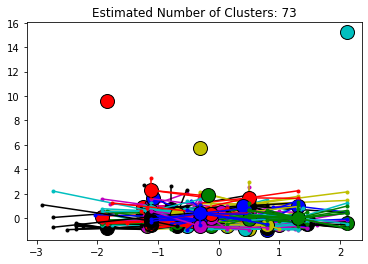

Estimated Number of Clusters: 73
Homogeneity: 0.175
Completeness: 0.032
V-measure: 0.055
Adjusted Rand Index: 0.0
Silhouette Coefficient: -0.498


In [15]:
dsyear = dataset[dataset["ano"] == YEAR]
true_labels = dsyear["riscofogocat"].values
features = dsyear[[
    "Diversidade Partidária",
    "Transporte Público",

    "Acesso à cultura, esporte e lazer",
    "Gravidez na infância e adolescência",
    "Trabalho Infantil",
    "Vulnerabilidade familiar",
    
    "Violência contra indígenas",
    "Violência contra indígenas Taxa",
    "Violência contra mulheres",
    "Violência infantil",
    "Violência infantil Taxa",

    "Empregos ensino superior",
    "Mulheres com empregos ensino superior"
]].values

xyz(features, true_labels)